# <div class="alert alert-block alert-success"> SOLUTIONS   </div>

### Day 4 - Machine Learning
4.5 Exercise

# Predicting OilField Output - Using Linear Regression

<img src = "images/logo.jpg" width="100" align="left">

Ram Narasimhan

Source: http://www.ijastnet.com/journals/Vol_1_No4_July_2011/14.pdf

<img src = "images/oilwell_decline.jpg" align="center">


<img src = "images/oilfield_lifestages.jpg" align="center">


# <div class="alert alert-block alert-success"> Question for the class:    </div>

## How can we predict Output of an Oil`Field`? 

Response: Quite a number of factors would have to be considered 
1. The age, the size, the type of lift (pump), the equipment and dozens of other factors will decide the production output of an Oil field. For our example, we are just given 7 variables, `x1` through `x7`. We are not told what they are.

We will use these `x-variables` (predictors) to predict the target variable: `total_production_volume`.

# <div class="alert alert-block alert-success"> Exercises    </div>


## 1. Read the file containing annual_oilfield_output
## 2. Split the data into `train` and `test`. (Test should have 6 years)
## 3. Build a Model for the `training` data. (Linear Regression)

## 4. What is Linear equation that describes the `OilProduction`?
## 5. Make Predictions for `test` data
## 6. What is the RMSE for the `test` data?
## 7. Plot the Predictions for `training` against `actuals.`


# <div class="alert alert-block alert-success"> If you get done with these, then please assist your classmates    </div>


# How to Perform a Linear Regression "fit" using Python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

In [5]:
# read data into a DataFrame
df = pd.read_csv('data/Linear Regression_China_Oilfield_Production/china_oilfield_annual.csv')
df.head() 

,year,x1,x2,x3,x4,x5,x6,x7,total_production_volume
0,1983,689,612,311,2375900,41.80%,1.45%,9.07%,1442800
1,1984,855,720,351,2305000,42.33%,1.53%,9.54%,1417200
2,1985,1028,874,426,2765900,42.93%,1.60%,9.49%,1466100
3,1986,1268,1087,472,3306400,46.21%,1.55%,10.25%,1454500
4,1987,1446,1197,652,3981400,45.80%,1.49%,9.35%,1489400


# Let's see what the variables (columns) in the data frame are.

In [6]:
df.dtypes

year                        int64
x1                          int64
x2                          int64
x3                          int64
x4                          int64
x5                         object
x6                         object
x7                         object
total_production_volume     int64
dtype: object

Note the columns x5, x6 and x7 are strings (objects). We want numbers to use them to make predictions.

There are some % signs. These need to be replaced.

In [8]:
# if you want to operate on multiple columns, put them in a list like so:
string_cols = ['x5', 'x6', 'x7']

# pass them to df.replace(), specifying each char and it's replacement:
df[string_cols] = df[string_cols].replace({'\%' : ''}, regex=True).astype(float)

# Another way to do it:
#df['x5'] = df['x5'].str.replace('\%', '')

In [9]:
df.set_index('year', inplace=True) #Make the column 'Year' to be the ROW INDEX

In [11]:
df.dtypes # make sure everything is numeric

x1                           int64
x2                           int64
x3                           int64
x4                           int64
x5                         float64
x6                         float64
x7                         float64
total_production_volume      int64
dtype: object

In [12]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7,total_production_volume
count,24.000000,24.000000,24.000000,2.400000e+01,24.000000,24.000000,24.000000,2.400000e+01
mean,4474.916667,3487.958333,859.916667,1.254121e+07,60.349167,1.160417,13.166667,3.949742e+06
std,3371.137983,2883.126224,487.336141,8.680148e+06,11.444300,0.258633,3.201741,2.513695e+06
min,689.000000,612.000000,311.000000,2.305000e+06,41.800000,0.830000,9.070000,1.417200e+06
25%,1845.250000,1497.250000,482.750000,5.089575e+06,48.925000,0.905000,9.982500,1.629025e+06
50%,3795.000000,2852.000000,731.500000,1.147070e+07,63.255000,1.145000,13.265000,3.609450e+06
75%,5556.250000,3548.750000,1043.250000,1.709108e+07,71.880000,1.385000,15.980000,4.835625e+06
max,12314.000000,11092.000000,2347.000000,3.298700e+07,72.950000,1.600000,17.740000,9.623000e+06


# Let's plot it and see what it looks 

(You should always try plotting your data to get a feel for it)

In [13]:
df

,x1,x2,x3,x4,x5,x6,x7,total_production_volume
year,,,,,,,,
1983,689,612,311,2375900,41.80,1.45,9.07,1442800
1984,855,720,351,2305000,42.33,1.53,9.54,1417200
1985,1028,874,426,2765900,42.93,1.60,9.49,1466100
1986,1268,1087,472,3306400,46.21,1.55,10.25,1454500
1987,1446,1197,652,3981400,45.80,1.49,9.35,1489400
1988,1705,1417,486,4551000,47.80,1.43,9.08,1559200
1989,1892,1524,458,5269100,49.30,1.31,9.31,1652300
1990,2113,1761,473,6020400,52.15,1.37,10.13,2024600
1991,2372,1903,506,7406200,55.46,1.26,10.88,2175900


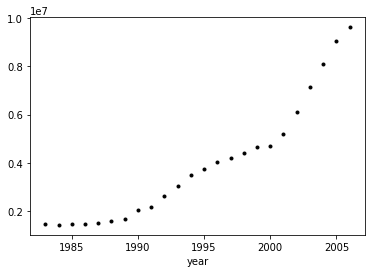

In [19]:
df.columns
# first, plot the observed data
#df.columns
df['y'].plot(style='.', color='black' )

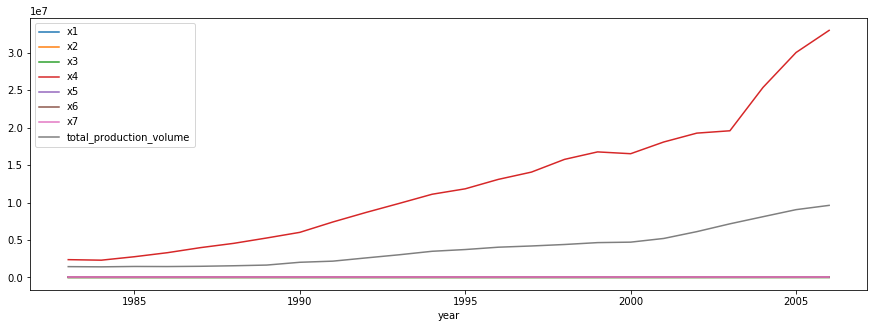

In [14]:
df.plot(figsize=(15,5)) # In this case we are plotting the entire data frame. (All the numerical columns)

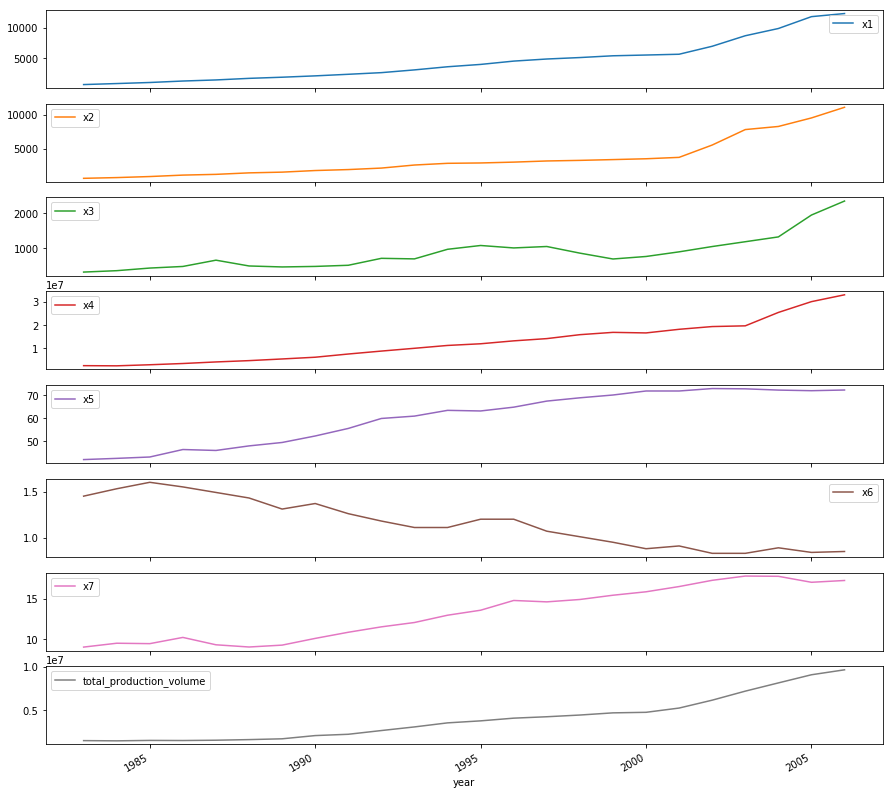

In [15]:
df.plot(subplots=True, figsize=(15,15));

# Split the dataframe into `train` and `test`

In [39]:
train_df = df[df.index <= 2000]
test_df  = df[df.index > 2000]


In the two lines above, we have taken one data frame called `df` and split it (based on time) into two.
The first one is called `train_df`. (All the years before and including 2000)
The second one is called `test_df` (All the years after 2000.)

In [40]:
train_df.shape, test_df.shape, 

((18, 8), (6, 8))

In [41]:
df.columns

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'total_production_volume'], dtype='object')

In [42]:
import statsmodels.api as sm

#We have to decide what we want to predict. This is called the 'target' variable.
#in our case, it is the total annual production volume
y = train_df['total_production_volume']

X1234 = train_df[['x1', 'x2', 'x3', 'x4']] #try to predict y using x1, x2, x3 and x4
X1234 = sm.add_constant(X1234) ## fit a OLS model with intercept (just adding a constant.)
#if we don't add the constant, it will force the linear model to go through 0,0

# create a fitted model in one line
china_mdl_1234 = sm.OLS(y, X1234).fit()
#In the code above, we are taking our data (train_df) and fitting it (calculating coeffs) to matchthe y value.
#the model has now decided what the best coeffients (m1 m2 m3 m4) are...

### Just for practice, let's also try building a second Linear model.

We can build as many as we like, with different combinations of x variables.

In [43]:
#CALL sm.OLS().fit()
X6 = train_df[['x6']] # try to predict using just one variable
X6 = sm.add_constant(X6)
china_mdl_6 = sm.OLS(y, X6).fit()

In [44]:
china_mdl_1234.summary()

C:\Users\Ram\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     total_production_volume   R-squared:                       0.988
Model:                                 OLS   Adj. R-squared:                  0.985
Method:                      Least Squares   F-statistic:                     275.9
Date:                     Thu, 04 Oct 2018   Prob (F-statistic):           1.99e-12
Time:                             14:19:29   Log-Likelihood:                -237.93
No. Observations:                       18   AIC:                             485.9
Df Residuals:                           13   BIC:                             490.3
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.242e+05   1.32e+05      4.728      0.000    3.39e+05    9.09e+05
x1            67.0188    287.232      0.233      0.819    -553.508     687.546
x2          -569.6422    290.409     -1.962      0.072   -1197.033      57.749
x3           750.3176    324.261      2.314      0.038      49.794    1450.841
x4             0.3045      0.104      2.933      0.012       0.080       0.529
==============================================================================
Omnibus:                        3.756   Durbin-Watson:                   1.163
Prob(Omnibus):                  0.153   Jarque-Bera (JB):                1.618
Skew:                          -0.367   Prob(JB):                        0.445
Kurtosis:                       1.728   Cond. No.                     3.57e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.57e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
china_mdl_6.summary()

C:\Users\Ram\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     total_production_volume   R-squared:                       0.858
Model:                                 OLS   Adj. R-squared:                  0.850
Method:                      Least Squares   F-statistic:                     97.03
Date:                     Thu, 04 Oct 2018   Prob (F-statistic):           3.39e-08
Time:                             14:19:29   Log-Likelihood:                -260.41
No. Observations:                       18   AIC:                             524.8
Df Residuals:                           16   BIC:                             526.6
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        9.58e+06   7.03e+05     13.630      0.000    8.09e+06    1.11e+07
x6         -5.415e+06    5.5e+05     -9.850      0.000   -6.58e+06   -4.25e+06
==============================================================================
Omnibus:                        0.186   Durbin-Watson:                   0.727
Prob(Omnibus):                  0.911   Jarque-Bera (JB):                0.383
Skew:                           0.133   Prob(JB):                        0.826
Kurtosis:                       2.336   Cond. No.                         12.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# a utility function to only show the coeff section of summary
from IPython.core.display import HTML

def short_summary(mdl):
    return HTML(mdl.summary().tables[1].as_html())

In [47]:
short_summary(china_mdl_1234)

C:\Users\Ram\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


,coef,std err,t,P>|t|,[0.025,0.975]
const,6.242e+05,1.32e+05,4.728,0.000,3.39e+05,9.09e+05
x1,67.0188,287.232,0.233,0.819,-553.508,687.546
x2,-569.6422,290.409,-1.962,0.072,-1197.033,57.749
x3,750.3176,324.261,2.314,0.038,49.794,1450.841
x4,0.3045,0.104,2.933,0.012,0.080,0.529


In [48]:
short_summary(china_mdl_6)

C:\Users\Ram\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


,coef,std err,t,P>|t|,[0.025,0.975]
const,9.58e+06,7.03e+05,13.630,0.000,8.09e+06,1.11e+07
x6,-5.415e+06,5.5e+05,-9.850,0.000,-6.58e+06,-4.25e+06


### Use the Model to make predictions

Statsmodel can be used to make predictions.

**Note** It expects the inputs to come as a data frame.



In [65]:
testX1234 = test_df[['x1', 'x2', 'x3', 'x4']]
testX1234 = sm.add_constant(testX1234)
test_preds_1234 = china_mdl_1234.predict(testX1234)


In [66]:
testX6 = test_df['x6']
testX6 = sm.add_constant(testX6)
test_preds_6 = china_mdl_6.predict(testX6)


### Plotting the Least Squares Line

Let's make predictions for the smallest and largest observed values of x, and then use the predicted values to plot the least squares line:

In [69]:
# make predictions for those x values and store them
train2_df = sm.add_constant(train_df[['x1', 'x2', 'x3', 'x4']])
train_preds = china_mdl_1234.predict(train2_df)


In [70]:
pd.DataFrame({'actual': test_df['total_production_volume'], 'predictions_x1234':test_preds_1234, 'preds_x6':test_preds_6})

,actual,predictions_x1234,preds_x6
year,,,
2001,5205000,5.067612e+06,4.652937e+06
2002,6115500,4.593413e+06,5.086124e+06
2003,7158700,3.607802e+06,5.086124e+06
2004,8109500,5.291056e+06,4.761234e+06
2005,9051000,6.595410e+06,5.031976e+06
2006,9623000,6.935795e+06,4.977827e+06


## Look at how this is plotting

This is plotting one plot on top of the other.
If the x-axis is the same, you can use that to your advantage by plotting on top of other plots.

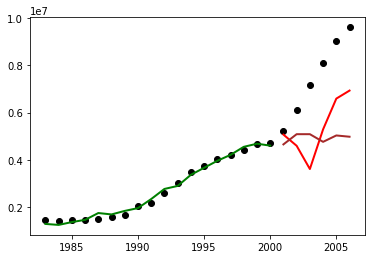

In [75]:
#df.plot(y='y', style='k.')
plt.scatter(df.index, df['total_production_volume'], c='k')

# then, plot the least squares line in red
plt.plot(train_df.index, train_preds, c='green', linewidth=2)
plt.plot(test_df.index, test_preds_1234, c='red', linewidth=2)
plt.plot(test_df.index, test_preds_6, c='brown', linewidth=2)

- In the plot above, the black dots are the ACTUAL (known) target values of the total production volume.
- The green line is the prediction of the model. (It looked at the answers to calculate the coeffs, so it is very good.)
- However, the brown values (x6) is a very bad fit.
- The red (x1234 model) is better, but it is not great.

![Questions](images/questions.png)